In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy import stats

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import statsmodels.formula.api as smf
import math

import warnings
warnings.simplefilter("ignore")

In [26]:
fund_pfm = pd.read_csv('2023_combined_data.csv')
fund_pfm

,time_period,time_identifier,geographic_level,country_code,country_name,old_la_code,new_la_code,la_name,school_ukprn,school_urn,...,pupil_premium,pupil_premium_pupils,universal_infant_free_school_meals_grant,pe_&_sport_premium,pe_&_sport_premium_pupils,coronavirus_recovery_premium_funding,School_led_tutoring_funding,schools_supplementary_grant,total_funding,Pupils_at_end_KS4
0,202223,Financial year,School,E92000001,England,301,E09000002,Barking and Dagenham,10000222,101247,...,291560,296,x,x,x,81972,49248,249881,8542828.0,231
1,202223,Financial year,School,E92000001,England,301,E09000002,Barking and Dagenham,10000527,101241,...,492993,501,x,x,x,148598,84024,389143,13420859.0,354
2,202223,Financial year,School,E92000001,England,301,E09000002,Barking and Dagenham,10071309,101202,...,209135,151,44741,20720,472,21895,24138,80619,3439599.0,0
3,202223,Financial year,School,E92000001,England,301,E09000002,Barking and Dagenham,10071301,101231,...,153735,111,29116,19540,354,17927,18117,62142,2633909.0,0
4,202223,Financial year,School,E92000001,England,301,E09000002,Barking and Dagenham,10029207,136028,...,511215,519,x,x,x,164595,91017,288410,9836214.0,259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20172,202223,Financial year,School,E92000001,England,816,E06000014,York,10068033,144712,...,1385,1,19366,17720,172,2000,486,22195,881517.0,0
20173,202223,Financial year,School,E92000001,England,816,E06000014,York,10077660,121366,...,12465,9,21904,18210,221,2000,2106,28598,1174457.0,0
20174,202223,Financial year,School,E92000001,England,816,E06000014,York,10065309,144267,...,119110,86,28582,19390,339,12615,13608,51133,1946172.0,0
20175,202223,Financial year,School,E92000001,England,816,E06000014,York,10073618,132228,...,113570,82,39132,19350,335,12325,13446,48085,1921109.0,0


In [27]:
fund_pfm[['universal_infant_free_school_meals_grant','pe_&_sport_premium',
      'pe_&_sport_premium_pupils','pupil_premium','pupil_premium_pupils',
      'coronavirus_recovery_premium_funding','School_led_tutoring_funding',
      'schools_supplementary_grant','lac_total_funding']] = fund_pfm[[
    'universal_infant_free_school_meals_grant','pe_&_sport_premium',
    'pe_&_sport_premium_pupils','pupil_premium','pupil_premium_pupils',
    'coronavirus_recovery_premium_funding','School_led_tutoring_funding',
    'schools_supplementary_grant','lac_total_funding']].replace(regex='([a-zA-Z*])', 
                                                                value=0).astype(int)

In [28]:
# delete the data that are not in the subset of two datsets
fund_pfm.drop(fund_pfm[fund_pfm.Pupils_at_end_KS4 == 0].index, inplace = True)
fund_pfm = fund_pfm.reset_index(drop=True)

In [29]:
# delete unnecessary features
fund_pfm.drop(['time_period','time_identifier','geographic_level',
           'country_code','country_name','school_ukprn','school_urn','school_laestab',
          'old_la_code','new_la_code','school_name','trust']
          ,axis='columns',inplace=True)

In [30]:
# Deleting breakdown cost --> keep only the summary cost 
fund_pfm.drop(['basic_entitlement_primary','basic_entitlement_ks3','basic_entitlement_ks4',
          'idaci_band_a','idaci_band_b','idaci_band_c','idaci_band_d','idaci_band_e',
           'idaci_band_f','fsm_funding','fsm6_funding'],axis='columns',inplace=True)

In [31]:
fund_pfm

,la_name,school_type,school_phase,academy,basic_entitlement_total_funding,idaci_funding,deprivation_total_funding,lac_total_funding,eal_total_funding,mobility_total_funding,...,pupil_premium,pupil_premium_pupils,universal_infant_free_school_meals_grant,pe_&_sport_premium,pe_&_sport_premium_pupils,coronavirus_recovery_premium_funding,School_led_tutoring_funding,schools_supplementary_grant,total_funding,Pupils_at_end_KS4
0,Barking and Dagenham,Voluntary aided school,Secondary,No,6331845,533121,945579,0,50234,0,...,291560,296,0,0,0,81972,49248,249881,8542828.0,231
1,Barking and Dagenham,Community school,Secondary,No,9671434,528532,1220587,0,88490,0,...,492993,501,0,0,0,148598,84024,389143,13420859.0,354
2,Barking and Dagenham,Voluntary controlled school,Secondary,No,6608425,619558,1344503,0,125739,7747,...,511215,519,0,0,0,164595,91017,288410,9836214.0,259
3,Barking and Dagenham,Community school,All-through,No,5305506,470656,1003830,0,245408,80336,...,401440,384,13223,17540,154,117097,67941,216661,8848755.0,192
4,Barking and Dagenham,Community school,All-through,No,9284231,636145,1440387,0,271664,22887,...,612165,589,38464,19610,361,156621,98766,373390,14341787.0,299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3221,York,Voluntary controlled school,Secondary,No,5295744,123715,380300,0,21536,0,...,190105,193,0,0,0,58309,32274,194490,6890047.0,211
3222,York,Academy converter,Secondary,Yes,5478912,81782,249542,0,4598,0,...,121155,123,0,0,0,38364,22680,184676,6731675.0,226
3223,York,Academy converter,Secondary,Yes,5021136,41884,227939,0,9180,0,...,137900,140,0,0,0,40848,24624,172876,6199597.0,209
3224,York,Academy sponsor led,Secondary,Yes,3069432,116241,336461,0,24480,0,...,167450,170,0,0,0,46920,27864,117597,4181049.0,108


In [32]:
df_LA = fund_pfm.groupby('la_name').agg(
    schools_count = ('la_name','count'),
    total_funding = ('total_funding','sum'),
    mean_funding = ('total_funding','mean'),
    total_pupils = ('total_number_of_pupils','sum'),
    Pupils_at_end_KS4 = ('Pupils_at_end_KS4','sum')).reset_index().sort_values('total_funding',ascending=False).head(10)
df_LA

,la_name,schools_count,total_funding,mean_funding,total_pupils,Pupils_at_end_KS4
61,Kent,96,569399890.0,5.931249e+06,89338,17068
6,Birmingham,85,554343270.0,6.521686e+06,75053,13977
41,Essex,76,499778751.0,6.576036e+06,79092,15618
54,Hertfordshire,80,465286608.0,5.816083e+06,73806,14154
48,Hampshire,68,437821768.0,6.438555e+06,70861,13701
67,Lancashire,80,432635500.0,5.407944e+06,66315,12663
124,Surrey,57,364613359.0,6.396726e+06,58865,11422
68,Leeds,43,323855839.0,7.531531e+06,47023,8810
91,Nottinghamshire,44,290531313.0,6.602984e+06,45634,8754
82,Norfolk,52,276543253.0,5.318139e+06,43457,8314


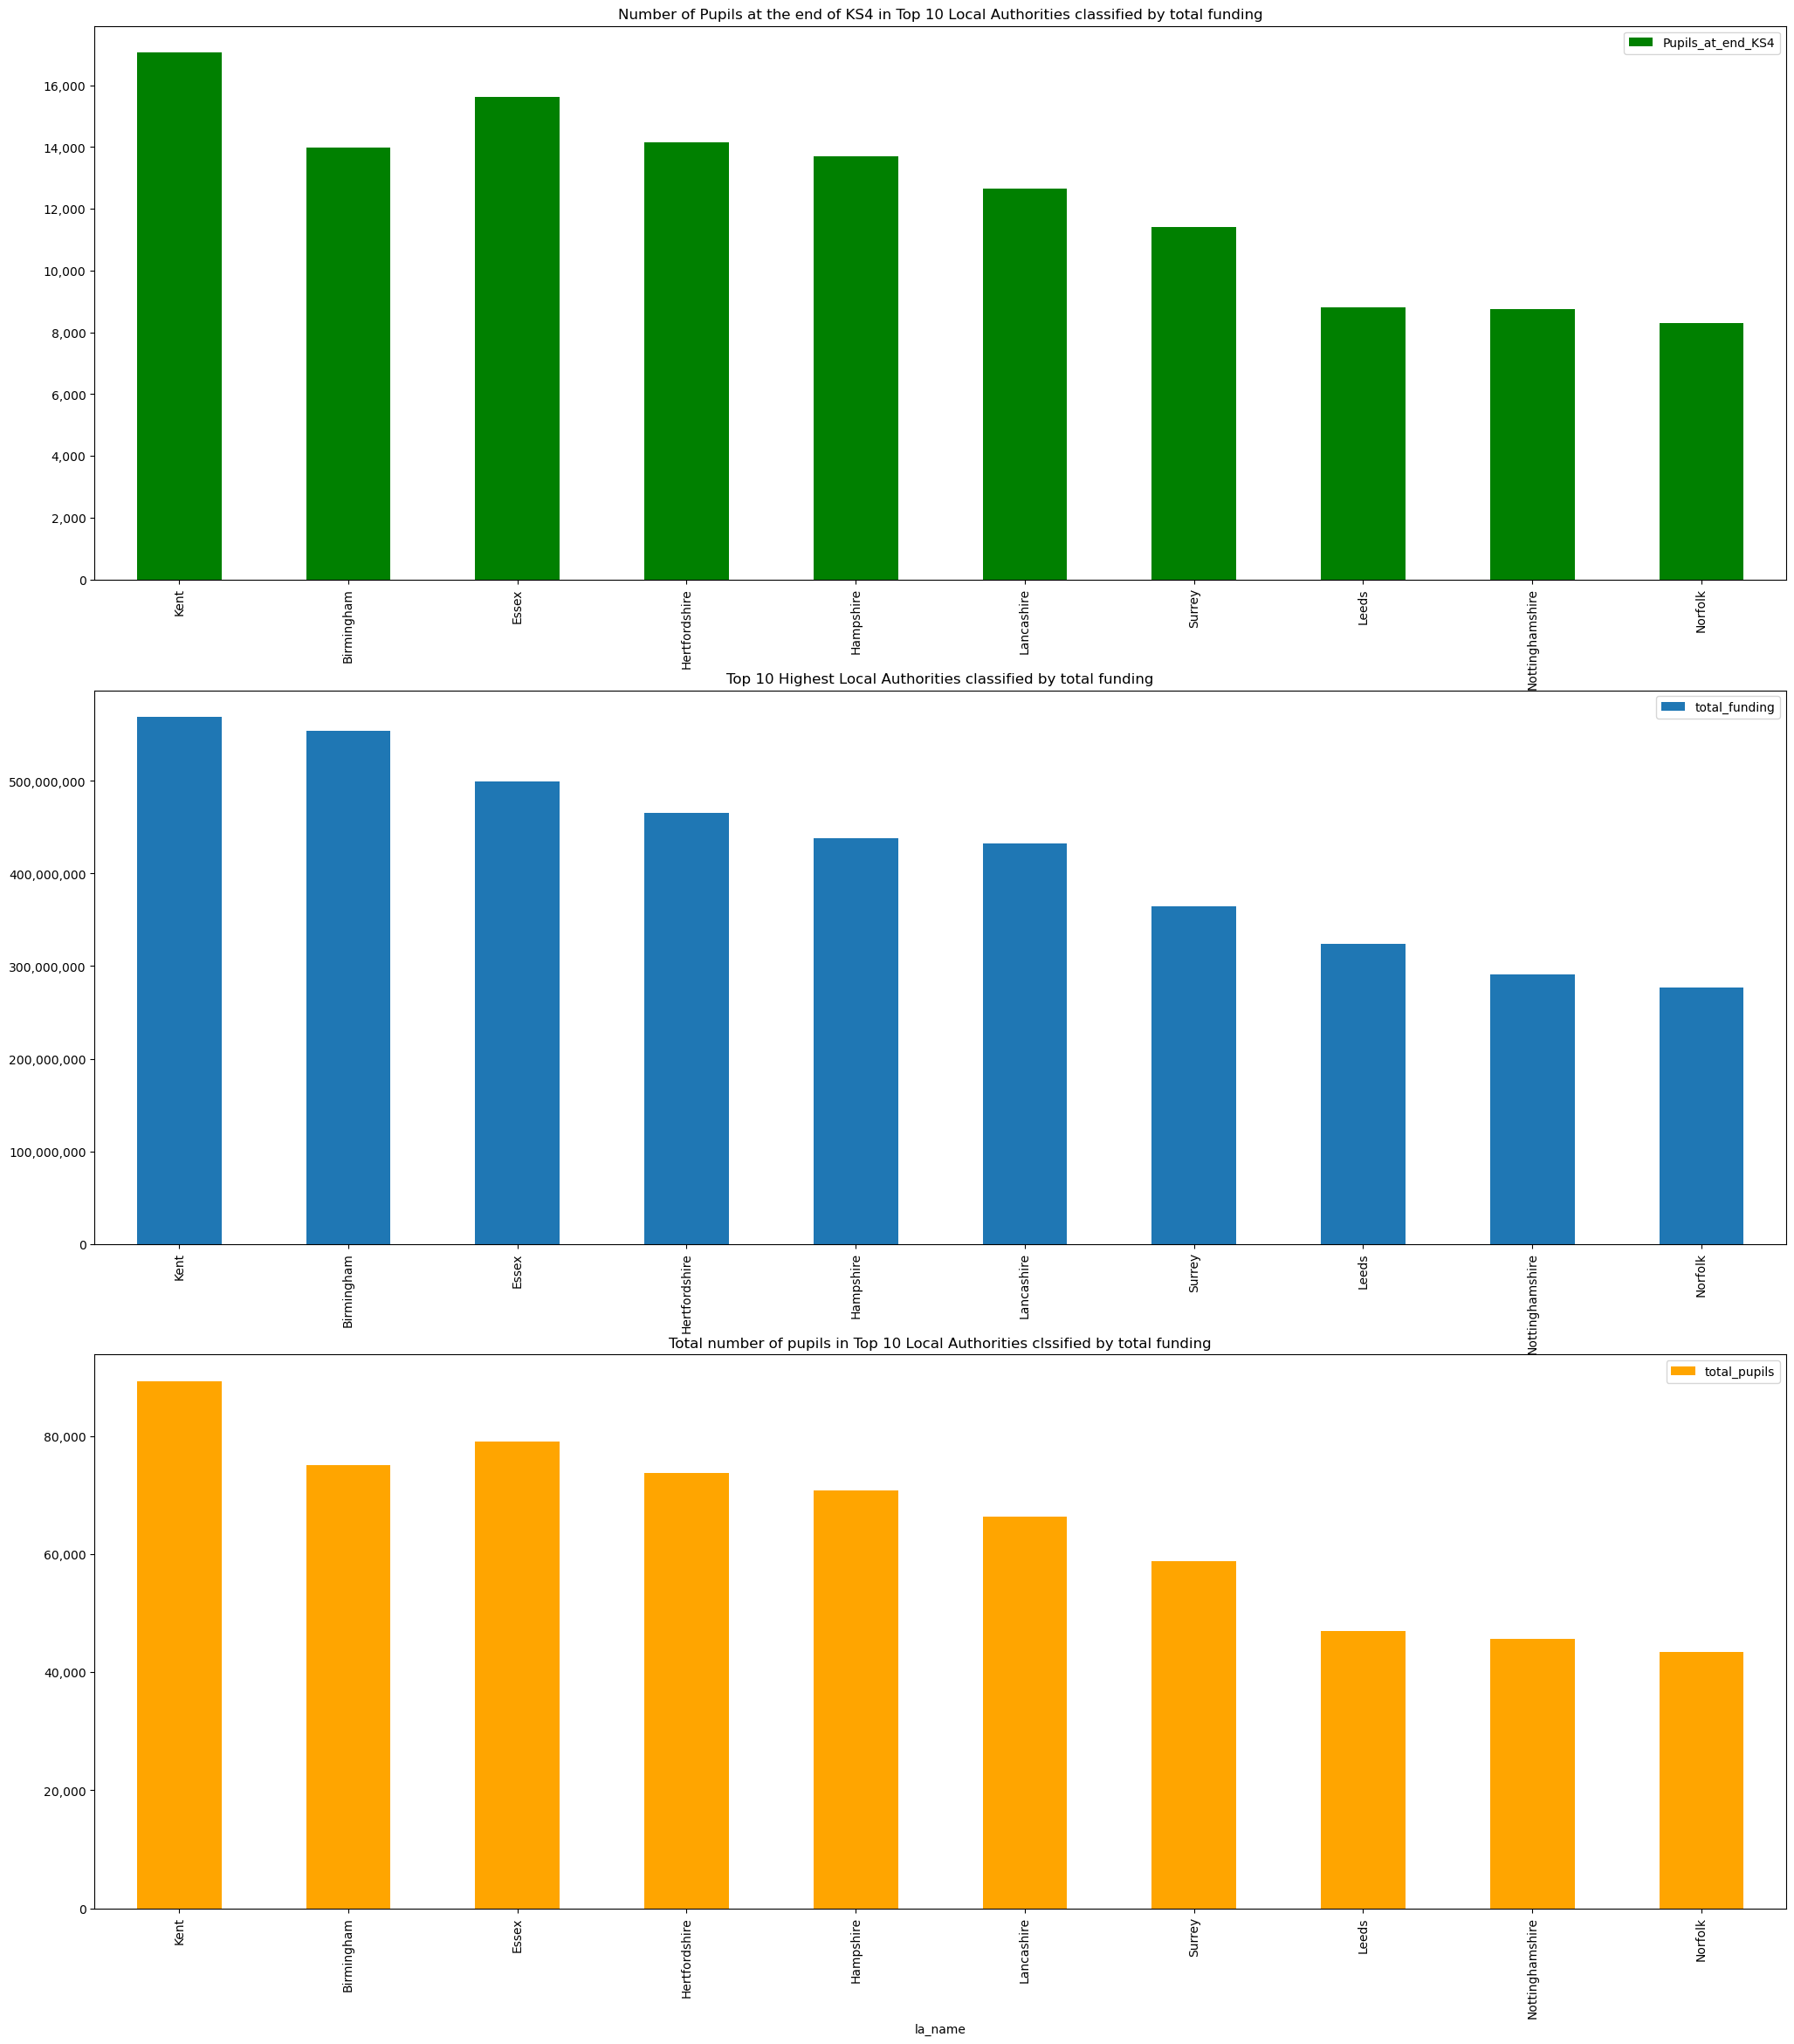

In [33]:
fig, axes = plt.subplots(nrows=3,ncols=1,figsize=(25,28))


df_LA.plot(kind='bar',x='la_name',y='Pupils_at_end_KS4',ax=axes[0],color='green',title='Number of Pupils at the end of KS4 in Top 10 Local Authorities classified by total funding')

df_LA.plot(kind='bar',x='la_name',y='total_funding',ax=axes[1], title='Top 10 Highest Local Authorities classified by total funding')

df_LA.plot(kind='bar',x='la_name',y='total_pupils', ax=axes[2], color='orange',title='Total number of pupils in Top 10 Local Authorities clssified by total funding')


current_values_ax0 = axes[0].get_yticks()
axes[0].set_yticklabels(['{:,.0f}'.format(x) for x in current_values_ax0])

current_values_ax1 = axes[1].get_yticks()
axes[1].set_yticklabels(['{:,.0f}'.format(x) for x in current_values_ax1])

current_values_ax2 = axes[2].get_yticks()
axes[2].set_yticklabels(['{:,.0f}'.format(x) for x in current_values_ax2])
plt.show()

## CHECK OUTLIERS

In [34]:
# Check outlier  --> z score (more than -3,3)
# only target variable
fund_copy = fund_pfm.copy()
fund_copy['z_pupils_KS4'] = np.abs(stats.zscore(fund_copy['Pupils_at_end_KS4']))
outlier_pupils_KS4 = list(np.where(np.abs(fund_copy['z_pupils_KS4'])>3)[0])
print('Index Outlier:',outlier_pupils_KS4)
print('Amount of Outlier for Pupils at end of KS4:',len(outlier_pupils_KS4),'\n')

Index Outlier: [43, 454, 455, 458, 702, 752, 759, 1128, 1645, 1651, 1879, 1882, 2108, 2543, 2600]
Amount of Outlier for Pupils at end of KS4: 15 



In [35]:
total_outliers = list(set(outlier_pupils_KS4))
print(total_outliers)
print('Number of total outliers:',len(total_outliers))

[454, 455, 1128, 2600, 458, 43, 1645, 1879, 2543, 752, 1651, 759, 1882, 2108, 702]
Number of total outliers: 15


In [36]:
fund_outliers = fund_copy.iloc[total_outliers,:]
fund_outliers.drop(['z_pupils_KS4'], axis= 'columns', inplace=True)
fund_outliers

,la_name,school_type,school_phase,academy,basic_entitlement_total_funding,idaci_funding,deprivation_total_funding,lac_total_funding,eal_total_funding,mobility_total_funding,...,pupil_premium,pupil_premium_pupils,universal_infant_free_school_meals_grant,pe_&_sport_premium,pe_&_sport_premium_pupils,coronavirus_recovery_premium_funding,School_led_tutoring_funding,schools_supplementary_grant,total_funding,Pupils_at_end_KS4
454,Central Bedfordshire,Academy converter,Secondary,Yes,5918827,32050,196520,0,4613,0,...,123125,125,0,0,0,36432,21708,214372,7142917.0,393
455,Central Bedfordshire,Academy converter,Secondary,Yes,6064638,31086,179311,0,1534,0,...,116230,118,0,0,0,43716,21906,217524,7296450.0,393
1128,Hampshire,Academy converter,Secondary,Yes,9406038,32802,391552,0,10846,0,...,267920,272,0,0,0,76176,45846,323259,11498002.0,391
2600,Staffordshire,Academy converter,Secondary,Yes,9174816,372270,881175,0,61200,0,...,402865,409,0,0,0,116472,69822,348495,12023034.0,379
458,Central Bedfordshire,Academy converter,Secondary,Yes,5408916,102055,315150,0,6120,0,...,165480,168,0,0,0,48300,28998,201584,6845278.0,374
43,Barnsley,Academy converter,Secondary,Yes,9510552,592340,1149955,0,36905,0,...,541750,550,0,0,0,161967,96165,359599,13719649.0,387
1645,Leicester,Academy converter,Secondary,Yes,8266320,397761,834161,0,137700,0,...,343765,349,0,0,0,96876,58320,297080,10818906.0,382
1879,Milton Keynes,Academy converter,Secondary,Yes,11528771,377167,1084987,0,88312,0,...,516140,524,0,0,0,146556,88128,424577,15011606.0,436
2543,Southwark,Academy converter,Secondary,Yes,13551855,540139,1017340,0,22805,0,...,327513,333,0,0,0,101154,60588,427984,17704849.0,430
752,Dorset,Academy converter,Secondary,Yes,5869872,32510,245810,0,1530,0,...,159570,162,0,0,0,44988,27054,215343,7502952.0,387


In [37]:
fund_outliers.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
basic_entitlement_total_funding,15.0,8160465.20,2486845.71,5347080.0,5991732.50,8266320.00,9624731.00,13551855.00
idaci_funding,15.0,238298.20,221407.82,31086.0,48044.50,127327.00,387464.00,618192.00
deprivation_total_funding,15.0,618066.87,386396.08,179311.0,293928.00,522797.00,949257.50,1291698.00
lac_total_funding,15.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00
eal_total_funding,15.0,27842.13,39163.09,1530.0,5366.50,10846.00,29855.00,137700.00
mobility_total_funding,15.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00
prior_attainment_total_funding,15.0,555990.40,209329.73,221404.0,424839.00,526626.00,712752.50,952185.00
lump_sum_total_funding,15.0,124983.93,13841.13,121171.0,121300.00,121300.00,121300.00,175000.00
sparsity_total_funding,15.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00
london_fringe,15.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00


In [38]:
print(fund_copy.shape)
fund_copy.drop(fund_copy.index[list(total_outliers)],inplace = True)
fund_copy = fund_copy.reset_index(drop=True)
print(fund_copy.shape)

(3226, 36)
(3211, 36)


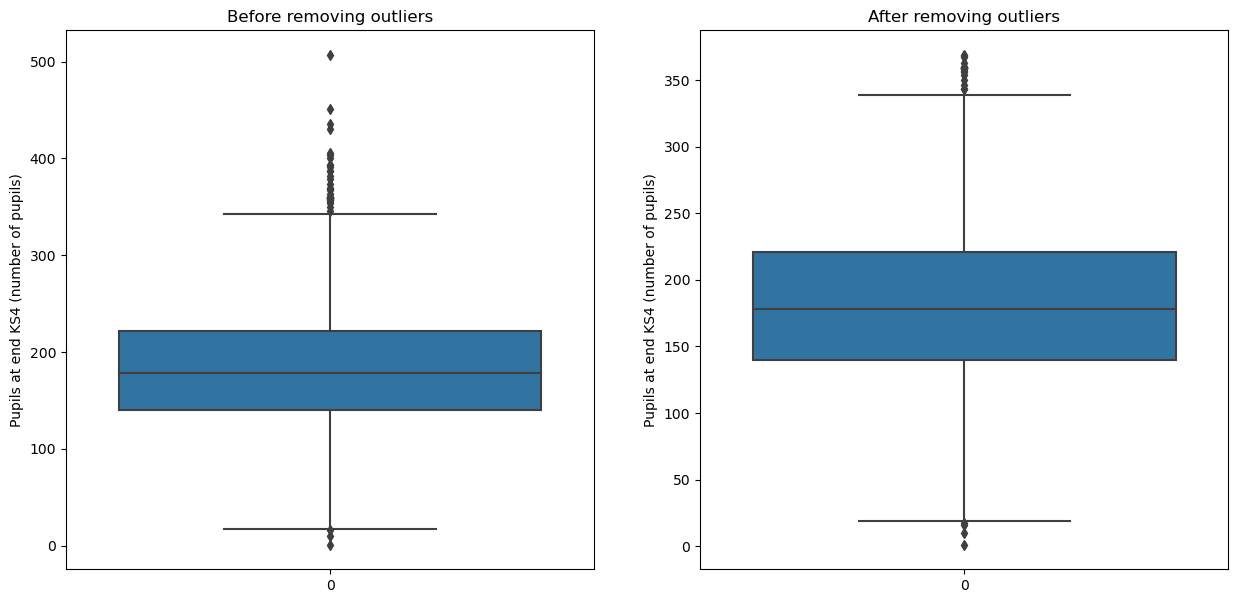

In [39]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,7))

sns.boxplot(data=fund_pfm['Pupils_at_end_KS4'],ax=axes[0])
sns.boxplot(data=fund_copy['Pupils_at_end_KS4'],ax=axes[1])
axes[0].title.set_text('Before removing outliers')
axes[1].title.set_text('After removing outliers')

for ax in axes:
    ax.set_ylabel('Pupils at end KS4 (number of pupils)')

## CHECK CORRELATION

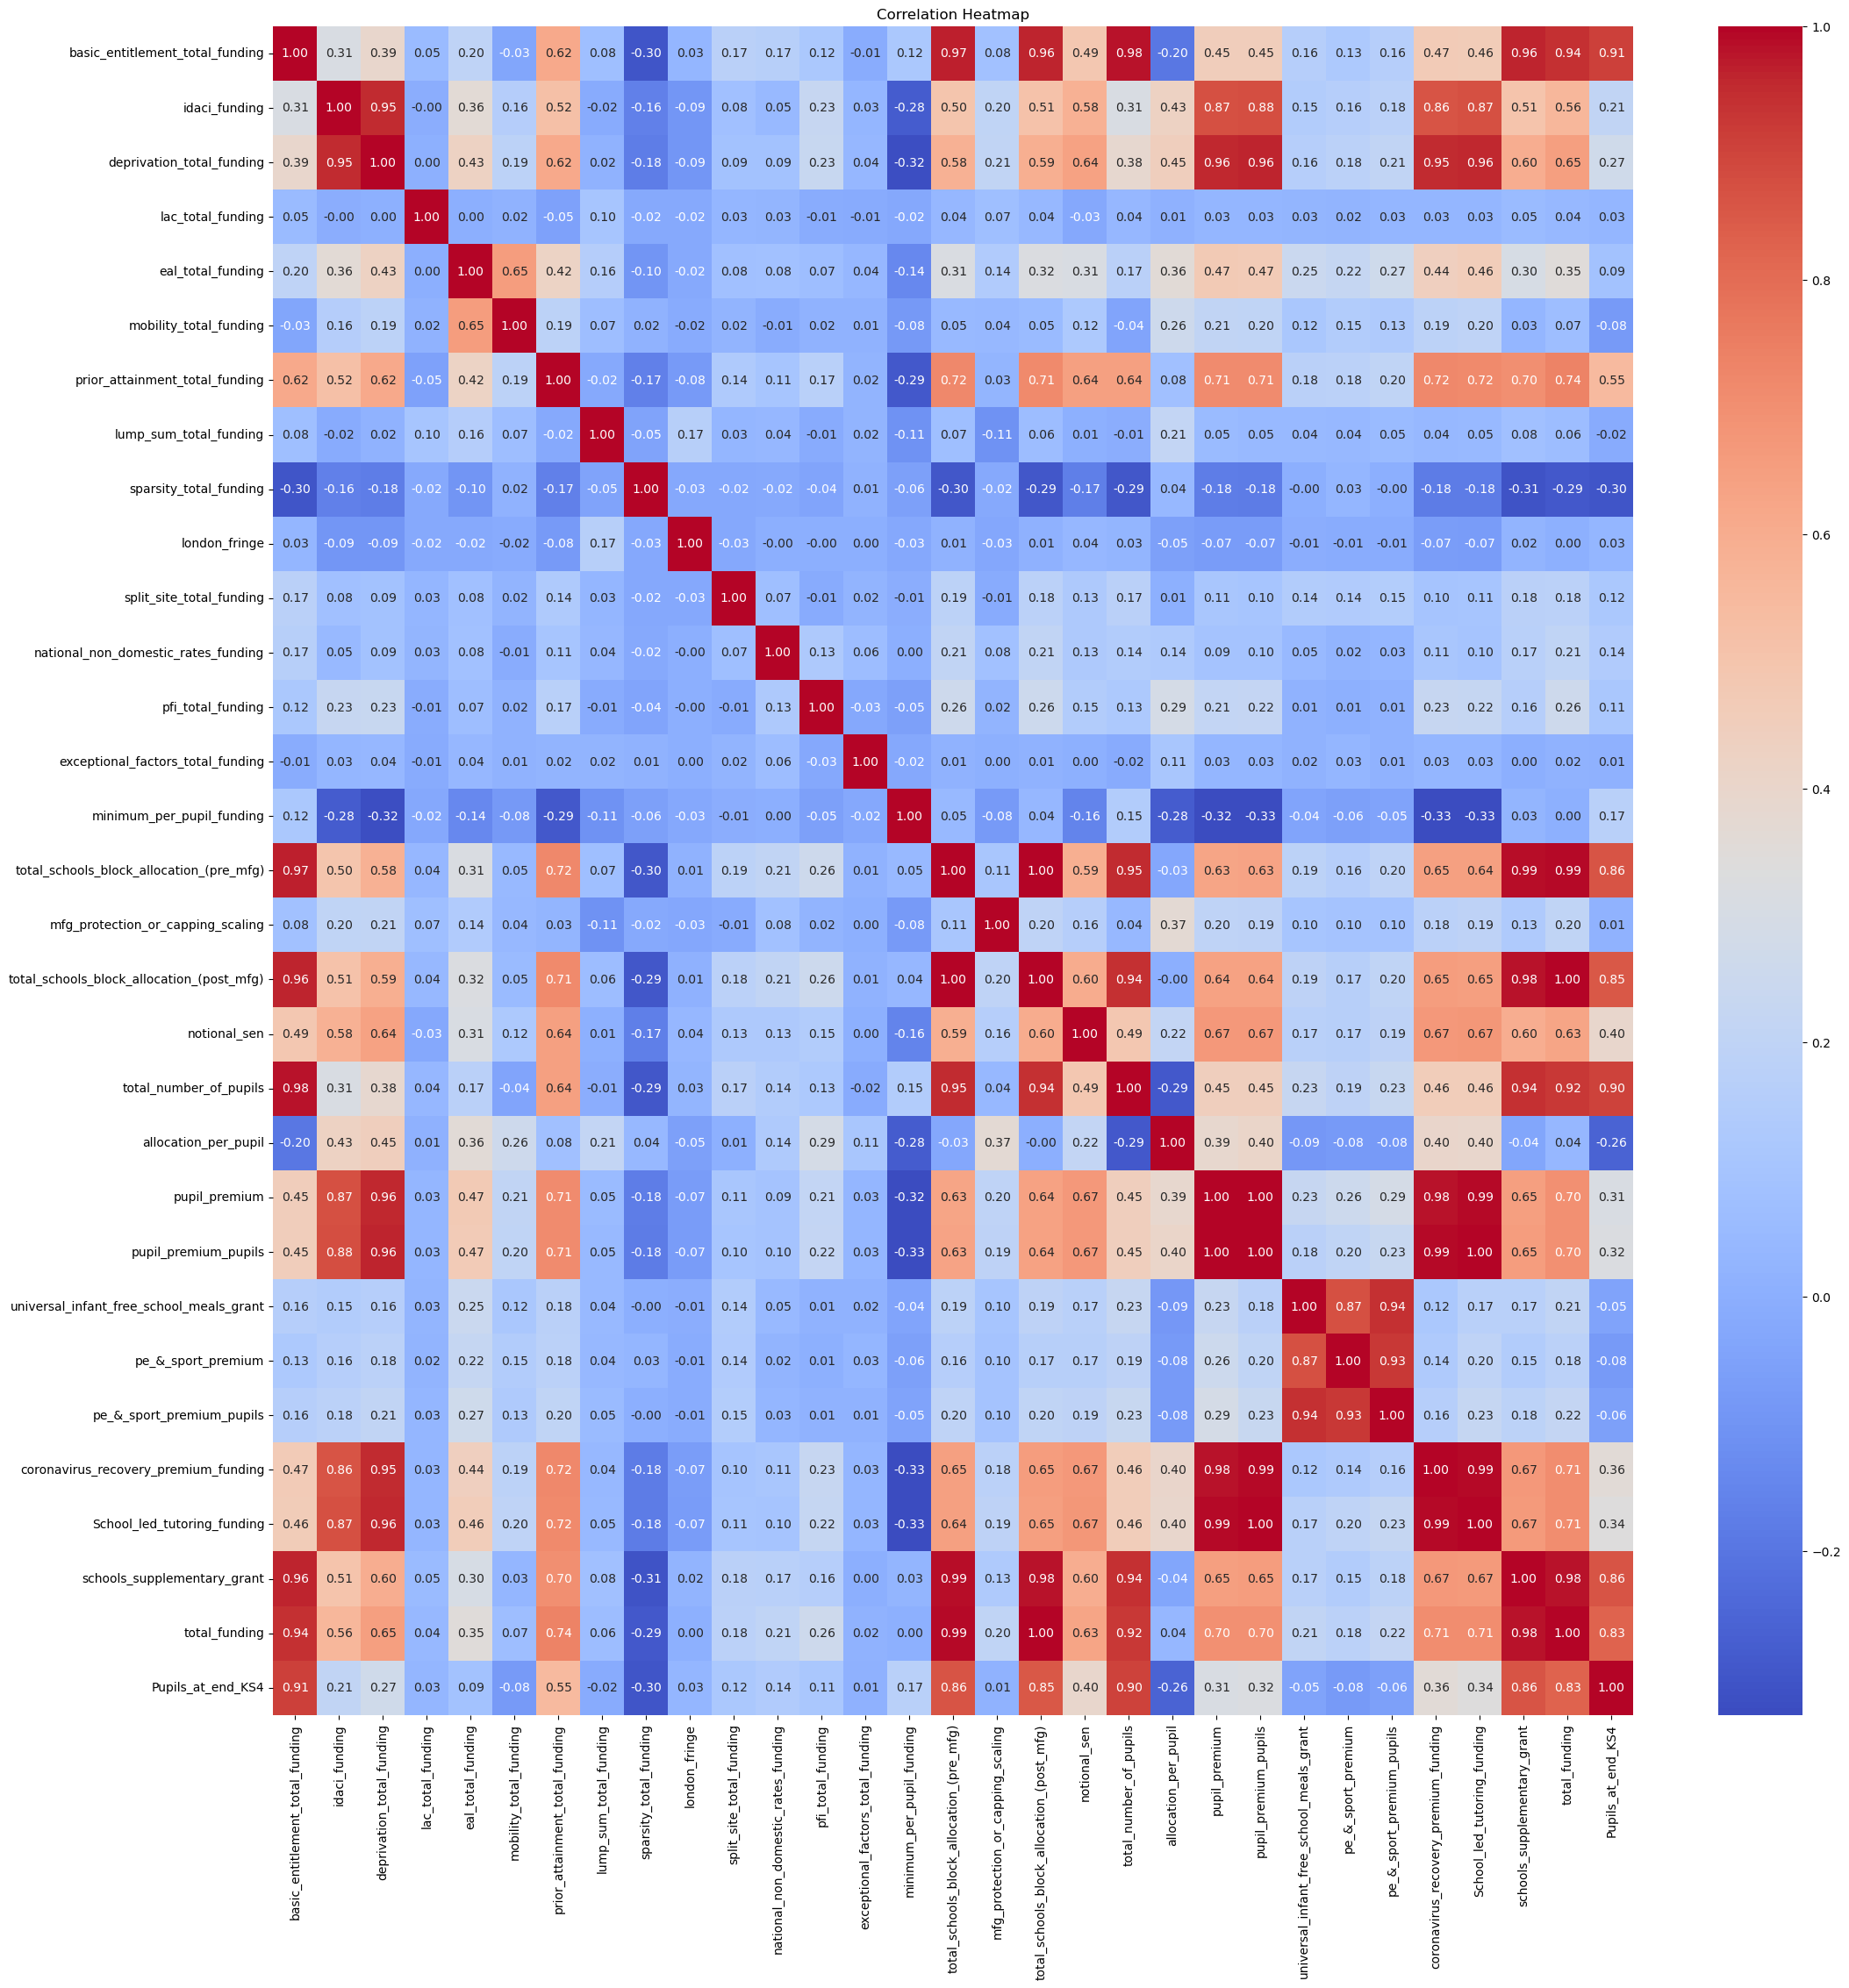

In [ ]:
# Calculate the Pearson correlation coefficient
correlation = fund_pfm.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(25, 25))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# OPERATING MODEL

## DATA PREPRARATION

In [40]:
fund_pfm.shape

(3226, 35)

In [41]:
no_cols = fund_pfm.shape[1]

x_num = fund_pfm.iloc[:,4: no_cols-1]
x_cat = fund_pfm.iloc[:,0:4]

y_data = fund_pfm.iloc[:, no_cols-1:] #remaining only last column

## Encoding 

In [42]:
dummy_cat = pd.get_dummies(x_cat, drop_first = True)
dummy_cat

,la_name_Barnet,la_name_Barnsley,la_name_Bath and North East Somerset,la_name_Bedford,la_name_Bexley,la_name_Birmingham,la_name_Blackburn with Darwen,la_name_Blackpool,la_name_Bolton,"la_name_Bournemouth, Christchurch and Poole",...,school_type_Foundation school,school_type_Free schools,school_type_Studio schools,school_type_University technical college,school_type_Voluntary aided school,school_type_Voluntary controlled school,school_phase_Middle deemed secondary,school_phase_Not applicable,school_phase_Secondary,academy_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


## Scaling 

In [43]:
scaled_num = StandardScaler().fit_transform(x_num)
scaled_num = pd.DataFrame(scaled_num, columns = x_num.columns)

In [44]:
concat_x = pd.concat([dummy_cat,scaled_num],axis=1)
concat_x

,la_name_Barnet,la_name_Barnsley,la_name_Bath and North East Somerset,la_name_Bedford,la_name_Bexley,la_name_Birmingham,la_name_Blackburn with Darwen,la_name_Blackpool,la_name_Bolton,"la_name_Bournemouth, Christchurch and Poole",...,allocation_per_pupil,pupil_premium,pupil_premium_pupils,universal_infant_free_school_meals_grant,pe_&_sport_premium,pe_&_sport_premium_pupils,coronavirus_recovery_premium_funding,School_led_tutoring_funding,schools_supplementary_grant,total_funding
0,0,0,0,0,0,0,0,0,0,0,...,0.538440,0.276484,0.296273,-0.187514,-0.221640,-0.198311,0.254331,0.264766,1.171318,0.998958
1,0,0,0,0,0,0,0,0,0,0,...,0.736841,1.598089,1.655259,-0.187514,-0.221640,-0.198311,1.874322,1.655164,3.479747,3.233812
2,0,0,0,0,0,0,0,0,0,0,...,1.122140,1.717644,1.774584,-0.187514,-0.221640,-0.198311,2.263284,1.934755,1.809981,1.591518
3,0,0,0,0,0,0,0,0,0,0,...,1.852083,0.997409,0.879643,1.767652,4.066572,1.805790,1.108385,1.012141,0.620658,1.139117
4,0,0,0,0,0,0,0,0,0,0,...,1.035482,2.379978,2.238628,5.499810,4.572649,4.499613,2.069399,2.244572,3.218623,3.655732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3221,0,0,0,0,0,0,0,0,0,0,...,-0.568535,-0.389163,-0.386534,-0.187514,-0.221640,-0.198311,-0.321028,-0.413881,0.253148,0.241742
3222,0,0,0,0,0,0,0,0,0,0,...,-0.871874,-0.841545,-0.850578,-0.187514,-0.221640,-0.198311,-0.805985,-0.797464,0.090470,0.169184
3223,0,0,0,0,0,0,0,0,0,0,...,-0.871874,-0.731681,-0.737881,-0.187514,-0.221640,-0.198311,-0.745587,-0.719740,-0.105129,-0.074586
3224,0,0,0,0,0,0,0,0,0,0,...,-0.420343,-0.537803,-0.539006,-0.187514,-0.221640,-0.198311,-0.597948,-0.590199,-1.021442,-0.999377


# Drop Uncorrelated data

In [46]:
#Correlation with output variable
corr_target = abs(correlation['Pupils_at_end_KS4'])

irrelevant_att = corr_target[corr_target < 0.60]
print(irrelevant_att)

idaci_funding                               0.209294
deprivation_total_funding                   0.268913
lac_total_funding                           0.031187
eal_total_funding                           0.088362
mobility_total_funding                      0.076472
prior_attainment_total_funding              0.548222
lump_sum_total_funding                      0.017495
sparsity_total_funding                      0.299778
london_fringe                               0.030662
split_site_total_funding                    0.121325
national_non_domestic_rates_funding         0.140448
pfi_total_funding                           0.113928
exceptional_factors_total_funding           0.010926
minimum_per_pupil_funding                   0.173138
mfg_protection_or_capping_scaling           0.014814
notional_sen                                0.395655
allocation_per_pupil                        0.259710
pupil_premium                               0.312109
pupil_premium_pupils                        0.

In [47]:
relevant_att = corr_target[corr_target > 0.60]
relevant_att.iloc[0:6]

basic_entitlement_total_funding              0.911216
total_schools_block_allocation_(pre_mfg)     0.862131
total_schools_block_allocation_(post_mfg)    0.851967
total_number_of_pupils                       0.904563
schools_supplementary_grant                  0.862445
total_funding                                0.826561
Name: Pupils_at_end_KS4, dtype: float64

In [48]:
cols = list([i for i in irrelevant_att.index])
x_reduced_60 = concat_x.copy()
x_reduced_60.drop(cols, axis=1, inplace=True)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x_reduced_60, y_data, test_size=0.2, random_state=42)

In [50]:
X_train_org, X_test_org, y_train_org , y_test_org = train_test_split(concat_x,y_data, test_size=0.2, random_state=42)

In [51]:
def evaluation_metrics(y_test,y_predict):
    mse = mean_squared_error(y_test, y_predict)
    r_squared = r2_score(y_test, y_predict)
    mea = mean_absolute_error(y_test, y_predict)
    rmse = math.sqrt(mse)
    
    print('Mean Squared Error:%.3f'% mse)
    print('R-Sqaured:%.3f'% r_squared)
    print('Mean Absolute Error:%.3f'% mea)
    print('Root Mean Squared Error:%.3f'% rmse)
    
    
    return('\n')

## NORMAL RUN

Multiple Linear Regression 

Mean Squared Error:373.688
R-Sqaured:0.911
Mean Absolute Error:12.642
Root Mean Squared Error:19.331




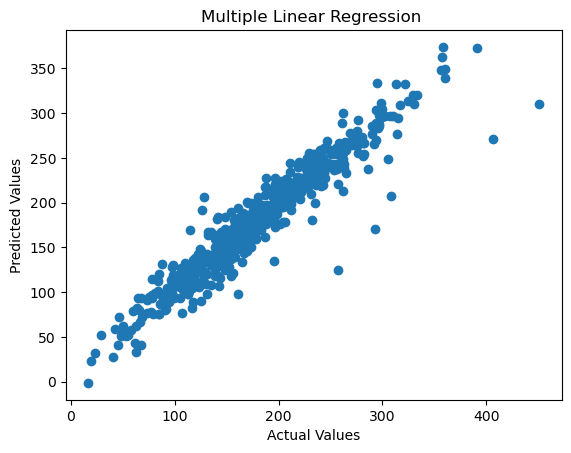

Random Forest Regression

Mean Squared Error:522.550
R-Sqaured:0.876
Mean Absolute Error:13.172
Root Mean Squared Error:22.859




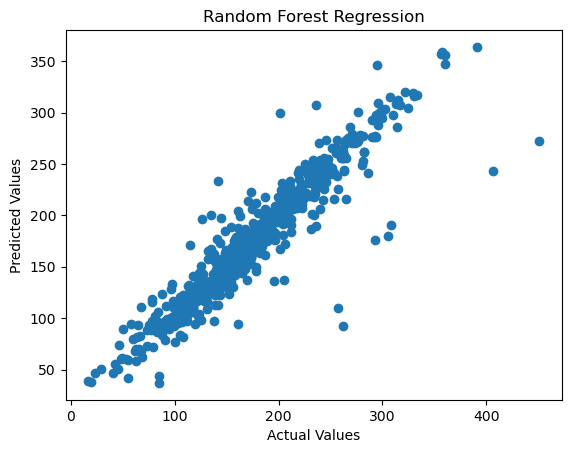

Lasso Regression

Mean Squared Error:578.032
R-Sqaured:0.862
Mean Absolute Error:14.625
Root Mean Squared Error:24.042




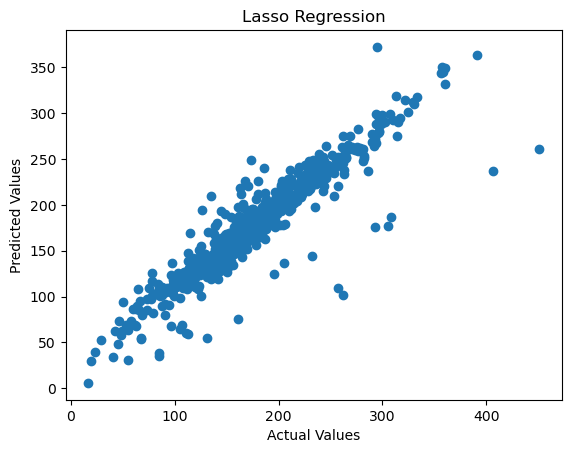

Ridge Regression

Mean Squared Error:411.123
R-Sqaured:0.902
Mean Absolute Error:12.864
Root Mean Squared Error:20.276




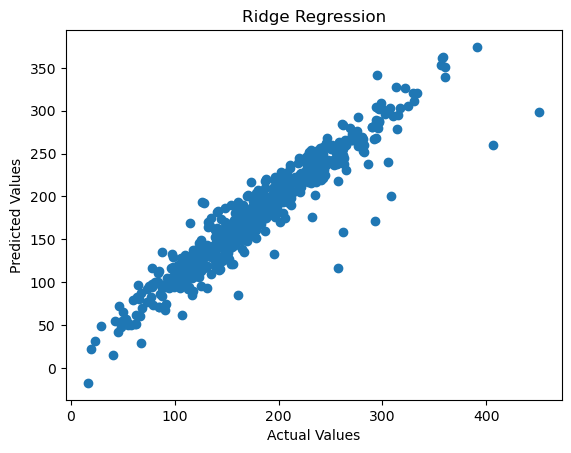

In [53]:
# with reduced features

algorithms = [
    [LinearRegression(), 'Multiple Linear Regression '],
    [RandomForestRegressor(n_estimators=100, random_state=42), 'Random Forest Regression'],
    [Lasso(alpha = 1.0), 'Lasso Regression'],
    [Ridge(alpha=1.0), 'Ridge Regression'],

]


for al in algorithms:
    model = al[0]
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)

    print(f'{al[1]}\n')
    print(evaluation_metrics(y_test, y_predict))
    
    plt.scatter(y_test, y_predict)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{al[1]}')
    plt.show()

Multiple Linear Regression 

Mean Squared Error:345.972
R-Sqaured:0.918
Mean Absolute Error:11.888
Root Mean Squared Error:18.600




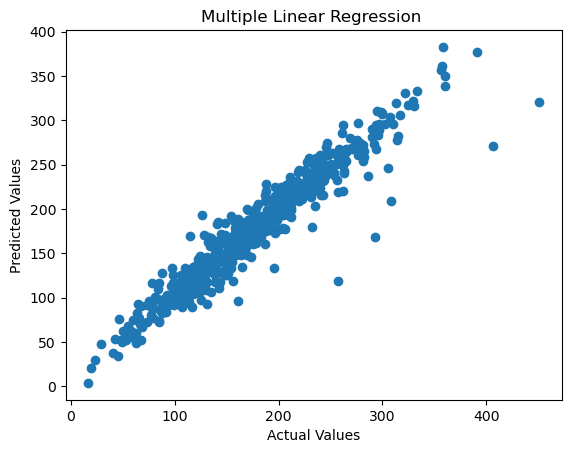

Random Forest Regression

Mean Squared Error:491.022
R-Sqaured:0.883
Mean Absolute Error:12.840
Root Mean Squared Error:22.159




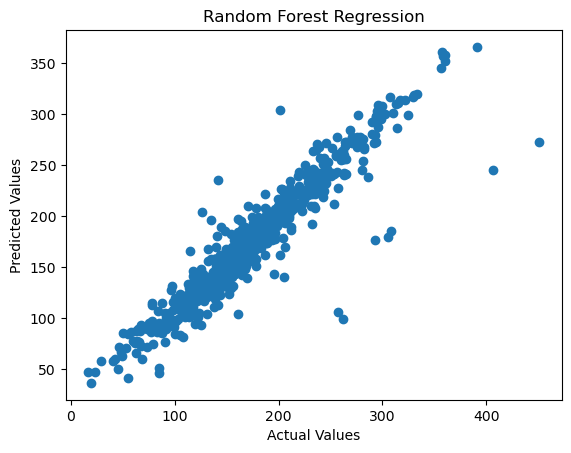

Lasso Regression

Mean Squared Error:500.287
R-Sqaured:0.881
Mean Absolute Error:12.914
Root Mean Squared Error:22.367




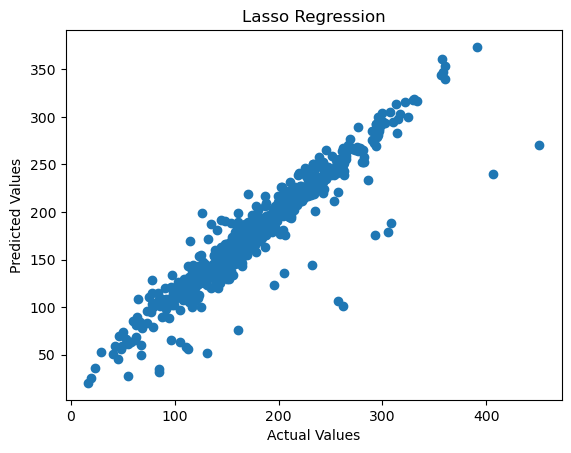

Ridge Regression

Mean Squared Error:361.416
R-Sqaured:0.914
Mean Absolute Error:11.865
Root Mean Squared Error:19.011




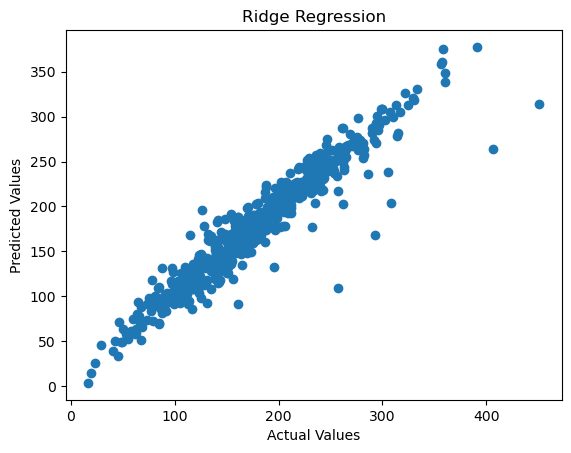

In [54]:
# with full dataset

algorithms = [
    [LinearRegression(), 'Multiple Linear Regression '],
    [RandomForestRegressor(n_estimators=100, random_state=42), 'Random Forest Regression'],
    [Lasso(alpha = 1.0), 'Lasso Regression'],
    [Ridge(alpha=1.0), 'Ridge Regression'],

]


for al in algorithms:
    model = al[0]
    model.fit(X_train_org,y_train_org)
    y_predict = model.predict(X_test_org)

    print(f'{al[1]}\n')
    print(evaluation_metrics(y_test_org, y_predict))
    
    plt.scatter(y_test_org, y_predict)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{al[1]}')
    plt.show()

## NORMAL RUN (Residual plot)

Multiple Linear Regression 


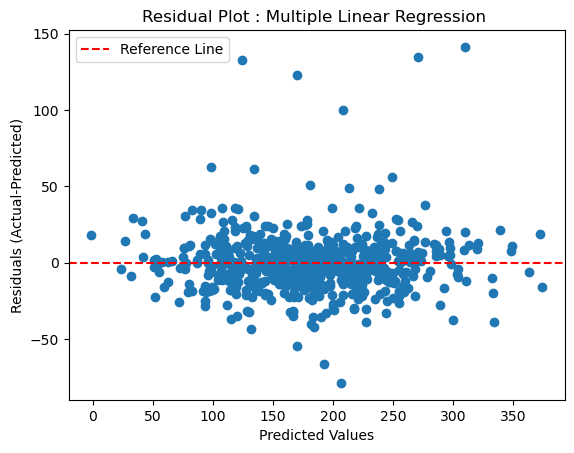

Random Forest Regression


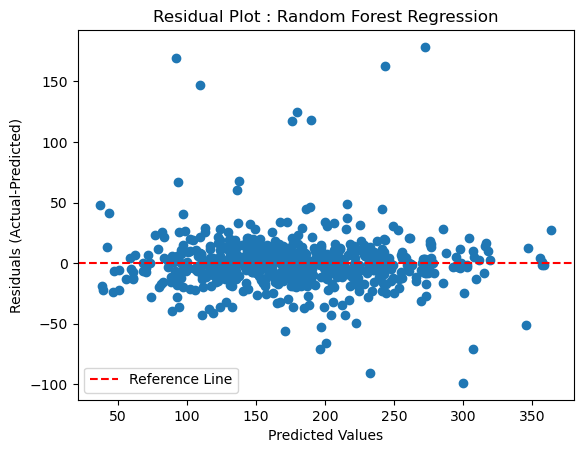

Lasso Regression


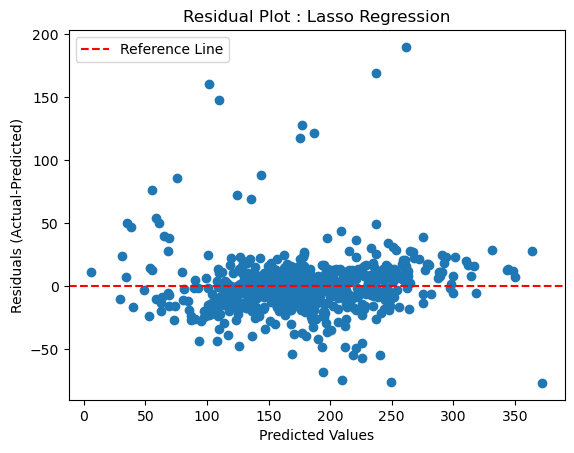

Ridge Regression


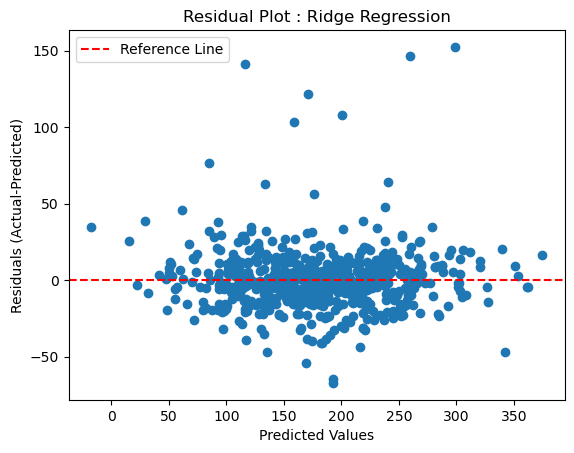

In [55]:
# Feature Reduction

algorithms = [
    [LinearRegression(), 'Multiple Linear Regression '],
    [RandomForestRegressor(n_estimators=100, random_state=42), 'Random Forest Regression'],
    [Lasso(alpha = 1.0), 'Lasso Regression'],
    [Ridge(alpha=1.0), 'Ridge Regression']
]

for al in algorithms:
    print(al[1])
    model = al[0]
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    
    residuals = np.array(y_test) - np.array(y_predict.reshape(646,1))
    plt.scatter(y_predict, residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals (Actual-Predicted)')
    plt.title(f'Residual Plot : {al[1]}')
    plt.axhline(y=0,color='r',linestyle='--',label='Reference Line')
    plt.legend()
    plt.show()

Multiple Linear Regression 


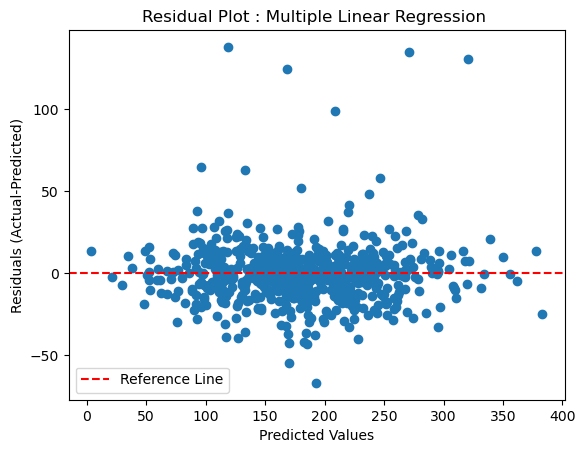

Random Forest Regression


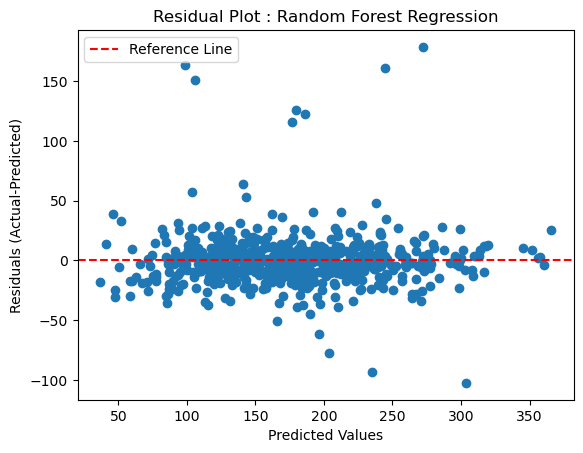

Lasso Regression


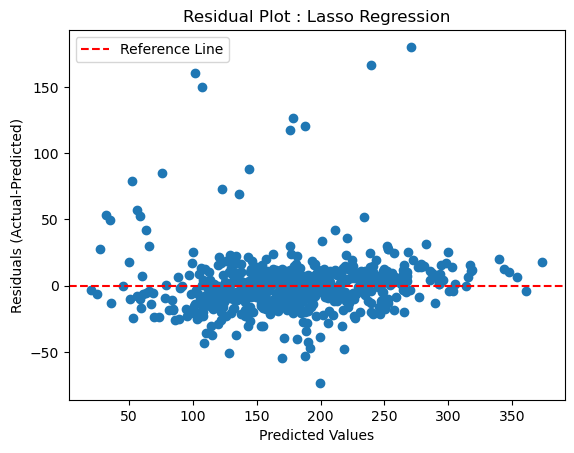

Ridge Regression


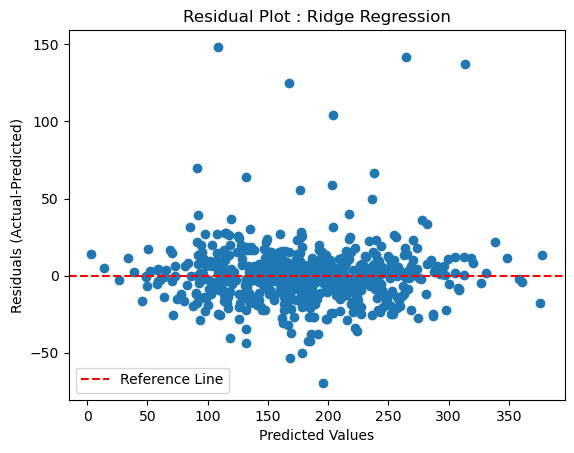

In [56]:
# Full Dataset

algorithms = [
    [LinearRegression(), 'Multiple Linear Regression '],
    [RandomForestRegressor(n_estimators=100, random_state=42), 'Random Forest Regression'],
    [Lasso(alpha = 1.0), 'Lasso Regression'],
    [Ridge(alpha=1.0), 'Ridge Regression']
]

for al in algorithms:
    print(al[1])
    model = al[0]
    model.fit(X_train_org,y_train_org)
    y_predict = model.predict(X_test_org)
    
    residuals = np.array(y_test_org) - np.array(y_predict.reshape(646,1))
    plt.scatter(y_predict, residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals (Actual-Predicted)')
    plt.title(f'Residual Plot : {al[1]}')
    plt.axhline(y=0,color='r',linestyle='--',label='Reference Line')
    plt.legend()
    plt.show()

## CROSS VALIDATION

In [57]:
#Feature reduction data set

algorithms = [
    [LinearRegression(), 'Multiple Linear Regression '],
    [RandomForestRegressor(n_estimators=100, random_state=42), 'Random Forest Regression'],
    [Lasso(alpha = 1.0), 'Lasso Regression'],
    [Ridge(alpha=1.0), 'Ridge Regression']

]

k = 5
results = {}

for al in algorithms:
    model = al[0]
    cv_results = cross_val_score(model, X_train,y_train,cv=k,scoring = 'neg_mean_squared_error')
    RMSE = np.sqrt(-cv_results)
    results[al[1]] = RMSE

test_results = {}
for al in algorithms:
    model = al[0]
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_predict)
    r_squared = r2_score(y_test, y_predict)
    mea = mean_absolute_error(y_test, y_predict)
    
    test_results[al[1]] = (mse,r_squared,mea)

for algorithm_name, rmse in results.items():
    print(f'Cross Validated RMSE for {algorithm_name}:{rmse.mean().round(3)}\n')

for model_name, test_result in test_results.items():
    mse, r_squared, mea = test_result
    print(f'{model_name}')
    print(f'Test Set MSE : {mse.round(3)}')
    print(f'Test Set R-squared : {r_squared.round(3)}')
    print(f'Test Set MAE : {mea.round(3)}\n')

Cross Validated RMSE for Multiple Linear Regression :2578485.808

Cross Validated RMSE for Random Forest Regression:20.642

Cross Validated RMSE for Lasso Regression:21.922

Cross Validated RMSE for Ridge Regression:19.412

Multiple Linear Regression 
Test Set MSE : 373.688
Test Set R-squared : 0.911
Test Set MAE : 12.642

Random Forest Regression
Test Set MSE : 522.55
Test Set R-squared : 0.876
Test Set MAE : 13.172

Lasso Regression
Test Set MSE : 578.032
Test Set R-squared : 0.862
Test Set MAE : 14.625

Ridge Regression
Test Set MSE : 411.123
Test Set R-squared : 0.902
Test Set MAE : 12.864



In [58]:
# Full data 

algorithms = [
    [LinearRegression(), 'Multiple Linear Regression '],
    [RandomForestRegressor(n_estimators=100, random_state=42), 'Random Forest Regression'],
    [Lasso(alpha = 1.0), 'Lasso Regression'],
    [Ridge(alpha=1.0), 'Ridge Regression']

]

k = 5
results = {}

for al in algorithms:
    model = al[0]
    cv_results = cross_val_score(model, X_train_org,y_train_org,cv=k,scoring = 'neg_mean_squared_error')
    RMSE = np.sqrt(-cv_results)
    results[al[1]] = RMSE

test_results = {}
for al in algorithms:
    model = al[0]
    model.fit(X_train_org,y_train_org)
    y_predict = model.predict(X_test_org)
    
    mse = mean_squared_error(y_test_org, y_predict)
    r_squared = r2_score(y_test_org, y_predict)
    mea = mean_absolute_error(y_test_org, y_predict)
    
    test_results[al[1]] = (mse,r_squared,mea)

for algorithm_name, rmse in results.items():
    print(f'Cross Validated RMSE for {algorithm_name}:{rmse.mean().round(3)}\n')

for model_name, test_result in test_results.items():
    mse, r_squared, mea = test_result
    print(f'{model_name}')
    print(f'Test Set MSE : {mse.round(3)}')
    print(f'Test Set R-squared : {r_squared.round(3)}')
    print(f'Test Set MAE : {mea.round(3)}\n')

Cross Validated RMSE for Multiple Linear Regression :36156126544.763

Cross Validated RMSE for Random Forest Regression:19.786

Cross Validated RMSE for Lasso Regression:19.848

Cross Validated RMSE for Ridge Regression:18.298

Multiple Linear Regression 
Test Set MSE : 345.972
Test Set R-squared : 0.918
Test Set MAE : 11.888

Random Forest Regression
Test Set MSE : 491.022
Test Set R-squared : 0.883
Test Set MAE : 12.84

Lasso Regression
Test Set MSE : 500.287
Test Set R-squared : 0.881
Test Set MAE : 12.914

Ridge Regression
Test Set MSE : 361.416
Test Set R-squared : 0.914
Test Set MAE : 11.865



# Hyper parameter (Features reduction Dataset)

In [59]:
hyper_algorithms = [
    (RandomForestRegressor(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]} ,'Random Forest'),
    (Lasso(), {'alpha': [0.1 , 1.0, 10.0]},'Lasso Regression'),
    (Ridge(), {'alpha': [0.1, 1.0, 10.0]}, 'Ridge Regression')
]


for al, param_grid, al_name in hyper_algorithms:
    grid_search = GridSearchCV(al, param_grid, cv=5, scoring = 'neg_mean_squared_error')
    grid_search.fit(X_train,y_train)
    
    best_model = grid_search.best_estimator_
    print(f'Best Parameters for {al_name}: {grid_search.best_params_}\n')
    
    # performing model with best parameter on the test sest
    
    test_predict = best_model.predict(X_test)
    print(f'{al_name}')
    test_evaluation = evaluation_metrics(y_test,test_predict)
    print('------------------------')


Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}

Random Forest
Mean Squared Error:509.135
R-Sqaured:0.879
Mean Absolute Error:12.877
Root Mean Squared Error:22.564
------------------------
Best Parameters for Lasso Regression: {'alpha': 0.1}

Lasso Regression
Mean Squared Error:492.734
R-Sqaured:0.883
Mean Absolute Error:13.308
Root Mean Squared Error:22.198
------------------------
Best Parameters for Ridge Regression: {'alpha': 0.1}

Ridge Regression
Mean Squared Error:382.843
R-Sqaured:0.909
Mean Absolute Error:12.702
Root Mean Squared Error:19.566
------------------------


# Hyper parameter (Full Dataset)

In [60]:
hyper_algorithms = [
    (RandomForestRegressor(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]} ,'Random Forest'),
    (Lasso(), {'alpha': [0.1 , 1.0, 10.0]},'Lasso Regression'),
    (Ridge(), {'alpha': [0.1, 1.0, 10.0]}, 'Ridge Regression')
]


for al, param_grid, al_name in hyper_algorithms:
    grid_search = GridSearchCV(al, param_grid, cv=5, scoring = 'neg_mean_squared_error')
    grid_search.fit(X_train_org,y_train_org)
    
    best_model = grid_search.best_estimator_
    print(f'Best Parameters for {al_name}: {grid_search.best_params_}\n')
    
    # performing model with best parameter on the test sest
    
    test_predict = best_model.predict(X_test_org)
    print(f'{al_name}')
    test_evaluation = evaluation_metrics(y_test_org,test_predict)
    print('------------------------')

Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}

Random Forest
Mean Squared Error:480.509
R-Sqaured:0.886
Mean Absolute Error:12.608
Root Mean Squared Error:21.921
------------------------
Best Parameters for Lasso Regression: {'alpha': 0.1}

Lasso Regression
Mean Squared Error:411.558
R-Sqaured:0.902
Mean Absolute Error:12.112
Root Mean Squared Error:20.287
------------------------
Best Parameters for Ridge Regression: {'alpha': 1.0}

Ridge Regression
Mean Squared Error:361.416
R-Sqaured:0.914
Mean Absolute Error:11.865
Root Mean Squared Error:19.011
------------------------
